In [1]:
import pickle
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
from tqdm import tqdm

# Make Dataframe

In [2]:
shots = os.listdir('/projects/EKOLEMEN/KSTAR_torbeam/KSTAR_TORBEAM/')

In [3]:
index = 0
for shot in tqdm(shots):
    df = None
    times = os.listdir('/projects/EKOLEMEN/KSTAR_torbeam/KSTAR_TORBEAM/' + shot)
    for time in times:
        for i in range(2):
            try:
                with open(f'/projects/EKOLEMEN/KSTAR_torbeam/KSTAR_TORBEAM/' + shot + '/' + time + f'/torbeam_{i}.pkl', 'rb') as f:
                    data = pickle.load(f)
            except:
                continue

            for trial_run in data.keys():
                temp = pd.DataFrame(data=data[trial_run], columns=data[trial_run].keys())
                if df is None:
                    df = temp
                else:
                    df = pd.concat([df, temp], axis=0)
    
    df.to_csv(f'/projects/EKOLEMEN/KSTAR_torbeam/torbeam_df/{shot}_data.csv')

  0%|          | 1/366 [00:08<50:40,  8.33s/it]

 57%|█████▋    | 210/366 [50:35<36:06, 13.89s/it]  /tmp/ipykernel_242694/2504183098.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], axis=0)
100%|██████████| 366/366 [1:28:43<00:00, 14.55s/it]


### Input data from hdf5 file

In [15]:
h5_file = h5.File('/projects/EKOLEMEN/KSTAR_torbeam/training_inputs.h5', 'r')

In [16]:
h5_file.keys()

<KeysViewHDF5 ['33384', '33385', '33386', '33388', '33389']>

In [19]:
h5_file['33384']['1.952'].keys()

<KeysViewHDF5 ['Br', 'Bt', 'Bt_center', 'Bz', 'Ip', 'PSIRZ_norm', 'R', 'R0', 'R_in', 'R_mid', 'R_out', 'Te_pos', 'Te_val', 'Z', 'Z0', 'bcentr_2', 'betan', 'betan_2', 'betap', 'ipmhd', 'li', 'ne_pos', 'ne_val', 'rho_pol', 'rho_tor']>

# Look at data

In [50]:
df = pd.read_csv('/projects/EKOLEMEN/KSTAR_torbeam/torbeam_df/34374_data.csv')

In [55]:
temp = df[df['gyro'] == 'EC2']
temp[temp['mode'] == -1]

,Unnamed: 0,rho_pol,psiN,rho_tor,R,Z,total_CD,absorbed_power_frac,CD_eta,pol_ang,tor_ang,mode,time,shot,gyro,freq
0,0,0.141199,0.019937,0.081435,1.838247,0.079480,2090.118754,1.0,0.004180,0.398481,-0.012812,-1,51456.0,34374,EC2,1.050000e+11
1,0,0.088642,0.007857,0.032094,1.837975,0.042554,2131.277443,1.0,0.004263,0.437755,-0.012812,-1,51456.0,34374,EC2,1.050000e+11
2,0,0.350386,0.122770,0.257235,1.843898,0.207335,1739.355528,1.0,0.003479,0.245794,-0.012812,-1,51456.0,34374,EC2,1.050000e+11
3,0,0.152156,0.023151,0.094564,1.838519,0.086481,2078.370303,1.0,0.004157,0.390873,-0.012812,-1,51456.0,34374,EC2,1.050000e+11
4,0,0.173423,0.030076,0.122847,1.839623,0.100265,2052.766204,1.0,0.004106,0.375912,-0.012812,-1,51456.0,34374,EC2,1.050000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,0,0.125348,0.015712,0.066065,1.838648,0.035207,8374.255653,1.0,0.016749,0.451161,-0.068635,-1,9553.0,34374,EC2,1.050000e+11
4195,0,0.464913,0.216144,0.357314,1.852197,0.253245,5865.450889,1.0,0.011731,0.195330,-0.068635,-1,9553.0,34374,EC2,1.050000e+11
4196,0,0.447072,0.199873,0.342385,1.850677,0.242146,5947.700041,1.0,0.011895,0.209919,-0.068635,-1,9553.0,34374,EC2,1.050000e+11
4197,0,0.267040,0.071310,0.199094,1.843918,0.128824,7009.466950,1.0,0.014019,0.352110,-0.068635,-1,9553.0,34374,EC2,1.050000e+11


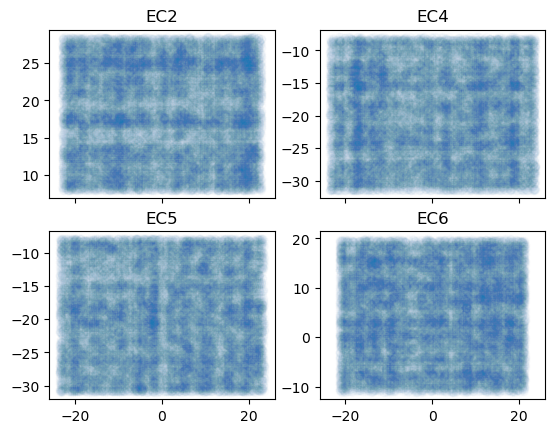

In [7]:
fig, ax = plt.subplots(2,2, sharex=True)

for i,gyro in enumerate(['EC2', 'EC4', 'EC5', 'EC6']):
    ax[int(i/2),i%2].scatter(np.rad2deg(df[df['gyro']==gyro]['tor_ang']), np.rad2deg(df[df['gyro']==gyro]['pol_ang']), alpha=0.01)
    ax[int(i/2),i%2].set_title(gyro)

# Make specific dataframe

In [4]:
training_inputs = h5.File('/projects/EKOLEMEN/KSTAR_torbeam/training_inputs.h5', 'r')

In [5]:
file_names = os.listdir('/projects/EKOLEMEN/KSTAR_torbeam/torbeam_df/')
useful_keys = ['rho_pol', 'R', 'Z', 'CD_eta', 'pol_ang', 'tor_ang', 'gyro', 'mode', 'time', 'shot', 'freq']
efit_keys = ['Bt_center', 'Ip', 'R0', 'R_in', 'R_out', 'Z0', 'aminor', 'betan', 'elong', 'gapin', 'gapout', 
             'gaptop', 'gapbot', 'li', 'ltri', 'utri', 'volume', 'wmhd'] # 'rseps', 'zseps'
prof_keys = ['ne_val']
skip = 10

dataframes = []
for fn in tqdm(file_names):
    df = pd.read_csv('/projects/EKOLEMEN/KSTAR_torbeam/torbeam_df/' + fn)
    
    df = df[useful_keys]
    df = df[df['gyro'] != 'EC6']

    shot = df['shot'][0]
    temp_times = (df['time'].unique() / 1000).astype(str)
    times = []
    for time in temp_times:
        if time in training_inputs[str(shot)].keys():
            times.append(time)
        else:
            nearest_time = min(training_inputs[str(shot)].keys(), key=lambda x: abs(float(x) - float(time)))
            times.append(nearest_time)

    for time in times:
        df_inds = df[df['time'] == float(time) * 1000].index
        for key in efit_keys:
            df.loc[df_inds, key] = np.array(training_inputs[str(shot)][time][key]) * np.ones(len(df_inds))
            ne_vals = np.array(training_inputs[str(shot)][time]['ne_val'])[::skip]
            for i in range(len(ne_vals)):
                df.loc[df_inds, f'ne_val_{i}'] = ne_vals[i] * np.ones(len(df_inds))

    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_csv('/projects/EKOLEMEN/KSTAR_torbeam/TORBEAM_all_df.csv')

  0%|          | 0/366 [00:00<?, ?it/s]

100%|██████████| 366/366 [06:50<00:00,  1.12s/it]


In [ ]:
useful_keys = ['pol_ang', 'tor_ang', 'gyro', 'mode', 'time', 'shot', 'freq']
efit_keys = ['Bt_center', 'Ip', 'R0', 'R_in', 'R_out', 'Z0', 'aminor', 'betan', 'elong', 'gapin', 'gapout', 
             'gaptop', 'gapbot', 'li', 'ltri', 'utri', 'volume', 'wmhd'] # 'rseps', 'zseps'
prof_keys = ['ne_val']

inputs = ['pol_ang', 'tor_ang', 'Bt_center', 'Ip', 'R0', 'R_in', 'R_out', 'Z0', 'aminor', 'betan', 'elong', 'gapin', 'gapout', 
             'gaptop', 'gapbot', 'li', 'ltri', 'utri', 'volume', 'wmhd', 'ne_val_0', 'ne_val_1', 'ne_val_2', 'ne_val_3', 'ne_val_4', 
             'ne_val_5', 'ne_val_6', 'ne_val_7', 'ne_val_8', 'ne_val_9', 'ne_val_10', 'ne_val_11', 'ne_val_12', 'ne_val_13', 'ne_val_14',
             'ne_val_15', 'ne_val_16', 'ne_val_17', 'ne_val_18', 'ne_val_19', 'ne_val_20']
outputs = ['rho_pol', 'R', 'Z', 'CD_eta']

In [6]:
combined_df[np.logical_and(combined_df['gyro'] == 'EC2', combined_df['mode'] == -1)].shape

(694886, 50)